<a href="https://colab.research.google.com/github/BOMBBAAM/senior-chula-tla-optim/blob/main/demo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as  np

In [181]:
np.__version__

'1.23.5'

# Formulate the probability vector

In [182]:
# Problem
n = 20
# before = np.random.rand(n)
# after = np.random.rand(n) * before
before = np.array([0.5, 0.7, 0.4, 0.45, 0.8, 0.3, 0.2, 0.3, 0.1, 0.25,0.7,0.5,0.35,0.45,0.7,0.5,0.6,0.2,0.3,0.5])
after = 0.5*before

# Difference of before and after
diff = before - after
diff.shape

(20,)

## Plot the density of difference between before and after

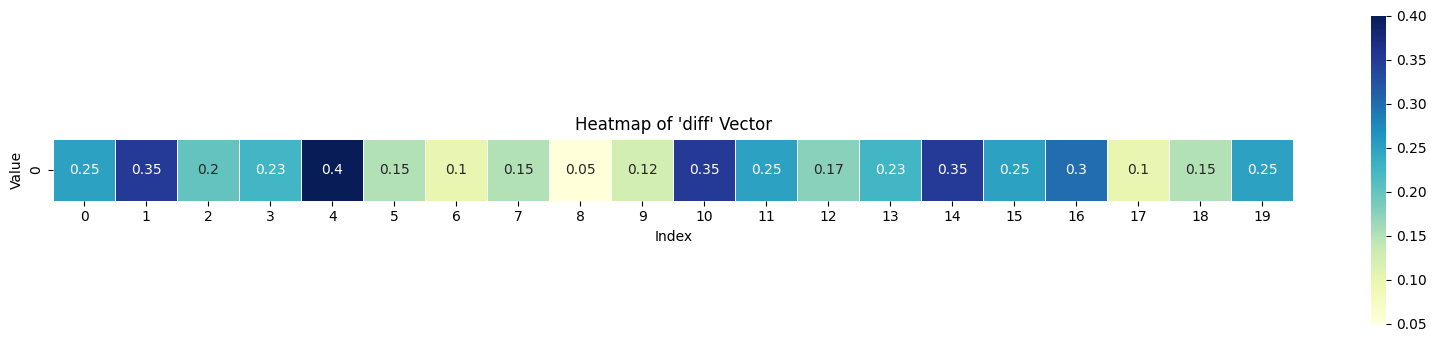

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape 'diff' into a 2D matrix
diff_matrix = diff.reshape(1, -1)

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 4))
sns.heatmap(diff_matrix, cmap="YlGnBu", annot=True, cbar=True, linewidths=0.5, square=True)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Heatmap of 'diff' Vector")
plt.show()

# Moving average window function

In [184]:
def moving_average(a, n=3):
    '''
    input :
        a is vector / array / list
        n is moving window size
    output :
        array of (index, average) pairs
    description :
        return np.array(((0, MA1), (1, MA2), (2, MA3), ...)) with size (n-1,)
    '''
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    indices = np.arange(n - 1, len(a))
    averages = ret[n - 1:] / n
    return np.array(list(zip(indices, averages)))

## substitute for n=3,4 and inspect the result

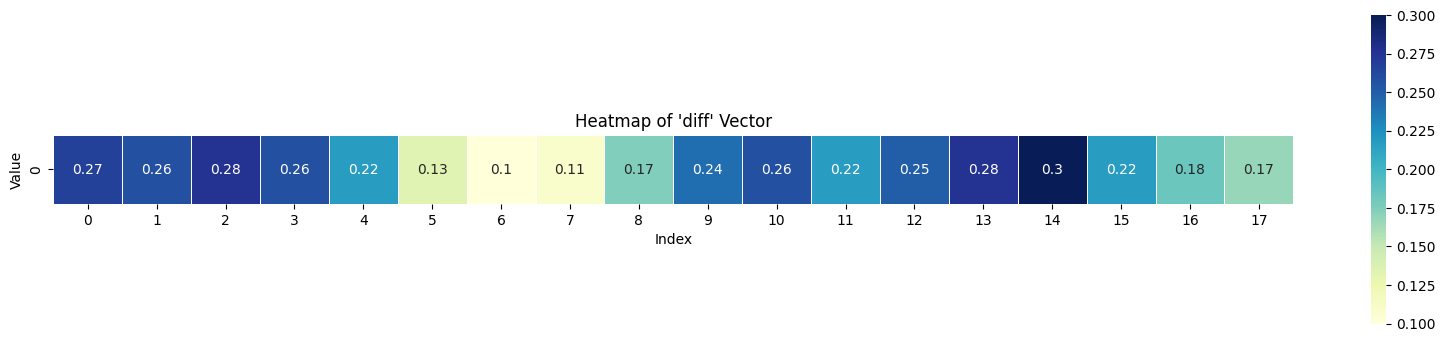

In [185]:
mvn_avg_diff = moving_average(diff,3)
# Create a heatmap using Seaborn
plt.figure(figsize=(20, 4))
sns.heatmap(mvn_avg_diff[:,1].reshape(1,-1), cmap="YlGnBu", annot=True, cbar=True, linewidths=0.5, square=True)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Heatmap of 'diff' Vector")
plt.show()

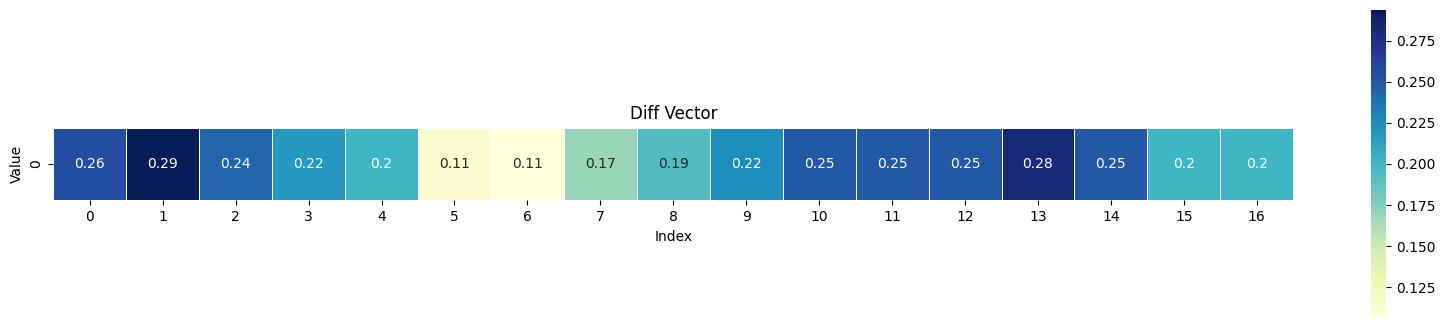

In [186]:
mvn_avg_diff = moving_average(diff,4)
# Create a heatmap using Seaborn
plt.figure(figsize=(20, 4))
sns.heatmap(mvn_avg_diff[:,1].reshape(1,-1), cmap="YlGnBu", annot=True, cbar=True, linewidths=0.5, square=True)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Diff Vector")
plt.show()

In [187]:
def max_diff(array, k):

    if len(array) < k:
        return 0

    max_mean = 0
    max_array = []

    for i in range(len(array)):
        for j in range(i + k, len(array) + k):
            subarray = array[i:j]
            if np.mean(subarray) > max_mean:
                max_array = []
                max_mean = np.mean(subarray)
            if np.mean(subarray) >= max_mean:
                max_array.append(list(subarray))
                max_mean = np.mean(subarray)

    return (max_mean, max_array)

In [188]:
for k in range(3,n):
    print(max_diff(diff, k))

(0.3, [[0.35, 0.25, 0.3]])
(0.29375, [[0.35, 0.2, 0.225, 0.4]])
(0.28500000000000003, [[0.25, 0.35, 0.2, 0.225, 0.4]])
(0.2714285714285714, [[0.35, 0.25, 0.175, 0.225, 0.35, 0.25, 0.3]])
(0.2714285714285714, [[0.35, 0.25, 0.175, 0.225, 0.35, 0.25, 0.3]])
(0.253125, [[0.125, 0.35, 0.25, 0.175, 0.225, 0.35, 0.25, 0.3]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
(0.25, [[0.25]])
